In [12]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
from matplotlib import pyplot as plt

In [13]:
mnist = datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

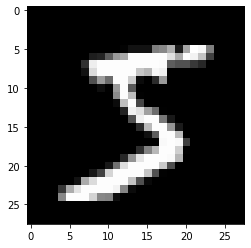

In [16]:
plt.figure()
plt.imshow(train_images[0], cmap=plt.get_cmap('gray'))

In [17]:
noise_factor = 0.25
train_images_noisy = train_images + noise_factor*np.random.normal(loc=0.0, scale=1.0, size=train_images.shape)
test_images_noisy = test_images + noise_factor*np.random.normal(loc=0.0, scale=1.0, size=test_images.shape)
train_images_noisy = np.clip(train_images_noisy, 0., 1.)
test_images_noisy = np.clip(test_images_noisy, 0., 1.)

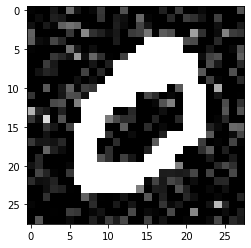

In [19]:
plt.figure()
plt.imshow(train_images_noisy[1], cmap=plt.get_cmap('gray'))

In [4]:
train_images = train_images_noisy / 255.0
test_images = test_images_noisy / 255.0

In [5]:
train_images = train_images.reshape(60000,28,28,1)
test_images = test_images.reshape(10000,28,28,1)

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(15, (7, 7), activation='relu', input_shape=(28,28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(10))

W0718 12:21:43.071703 140696839067456 deprecation.py:506] From /home/sidathm/.local/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [8]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 11s 180us/sample - loss: 0.9406 - acc: 0.7534
Epoch 2/10
60000/60000 [==============================] - 11s 181us/sample - loss: 0.4266 - acc: 0.8742
Epoch 3/10
60000/60000 [==============================] - 10s 168us/sample - loss: 0.3743 - acc: 0.8882
Epoch 4/10
60000/60000 [==============================] - 11s 176us/sample - loss: 0.3463 - acc: 0.8969
Epoch 5/10
60000/60000 [==============================] - 12s 198us/sample - loss: 0.3231 - acc: 0.9029
Epoch 6/10
60000/60000 [==============================] - 10s 172us/sample - loss: 0.2993 - acc: 0.9112
Epoch 7/10
60000/60000 [==============================] - 10s 168us/sample - loss: 0.2751 - acc: 0.9193
Epoch 8/10
60000/60000 [==============================] - 9s 153us/sample - loss: 0.2508 - acc: 0.9269
Epoch 9/10
60000/60000 [==============================] - 11s 176us/sample - loss: 0.2260 - acc: 0.9345
Epoch 10/10
60000/60000 [==============================] - 11s 18

In [9]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1)

print('\nTest accuracy:', test_acc)

10000/10000 [==============================] - 1s 67us/sample - loss: 0.1844 - acc: 0.9470

Test accuracy: 0.947
